## 1. 导入

In [23]:
import torch.utils.data as data
from torchvision import transforms
from PIL import Image
import os
import torch
import numpy as np
import matplotlib.pyplot as plt

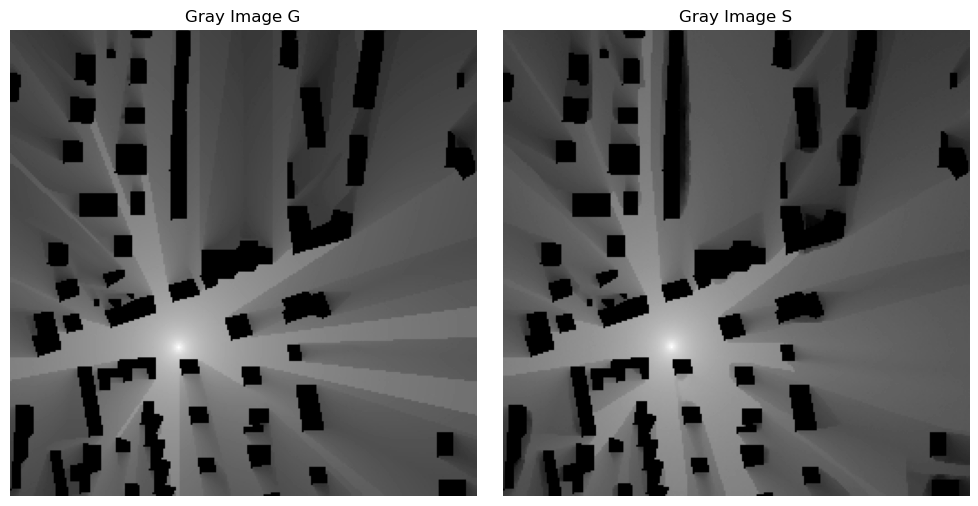

In [24]:

g_path= "/home/y/project/dm/Palette-Image-to-Image-Diffusion-Models/result_m2s/original_256.jpg"
s_path = "/home/y/project/dm/Palette-Image-to-Image-Diffusion-Models/result_m2s/output_256.jpg"
# s_path = "/home/y/project/dm/Palette-Image-to-Image-Diffusion-Models/result/output_256.jpg"
# 加载图像
g_image = Image.open(g_path).convert('L')  # 转换为灰度图像
s_image = Image.open(s_path).convert('L')
# 创建一个图形窗口
plt.figure(figsize=(10, 5))

# 显示第一张图像
plt.subplot(1, 2, 1)  # 1行2列的第1个子图
plt.imshow(g_image, cmap='gray')
plt.title('Gray Image G')
plt.axis('off')  # 不显示坐标轴

# 显示第二张图像
plt.subplot(1, 2, 2)  # 1行2列的第2个子图
plt.imshow(s_image, cmap='gray')
plt.title('Gray Image S')
plt.axis('off')  # 不显示坐标轴

# 显示图像
plt.tight_layout()
plt.show()

## 2.分析

#### 判断基站位置是否一致

In [25]:
g_array = np.array(g_image)
s_array = np.array(s_image)
# 生成255像素的布尔掩膜
index_g = np.argwhere(g_array == 255)
index_s = np.argwhere(s_array == 255)
print('index_g:',index_g)
print('index_s:',index_s)

index_g: [[174  92]]
index_s: [[174  92]]


In [26]:

# 选择一个中心位置（例如第一个255像素的位置）
center_x, center_y = index_g[0]

# 计算3×3矩形的边界
start_x, end_x = center_x - 2, center_x + 3
start_y, end_y = center_y - 2, center_y + 3

# 确保边界在数组范围内
start_x = max(0, start_x)
start_y = max(0, start_y)
end_x = min(g_array.shape[0], end_x)
end_y = min(g_array.shape[1], end_y)

# 访问3×3矩形的像素值
patch_g = g_array[start_x:end_x, start_y:end_y]
patch_s = s_array[start_x:end_x,start_y:end_y]
print('antenna patch of real image:\n',patch_g)
print('antenna patch of sample image:\n',patch_s)

antenna patch of real image:
 [[223 232 232 233 223]
 [232 236 245 236 232]
 [232 245 255 245 232]
 [232 236 245 236 232]
 [223 232 232 232 222]]
antenna patch of sample image:
 [[228 236 240 234 226]
 [233 244 248 241 231]
 [234 242 255 238 230]
 [228 234 235 234 225]
 [221 226 227 225 220]]


In [27]:
index_s

array([[174,  92]])

#### 2.1 计算评估指标

In [28]:
g_image_np = np.array(g_image).astype(np.float32)  #uint8存在减法溢出

s_image_np = np.array(s_image).astype(np.float32)
# 确保图像大小相同
assert g_image_np.shape == s_image_np.shape, "图像大小不匹配"

# 计算RMSE
rmse = np.sqrt(np.mean((g_image_np - s_image_np) ** 2))

print(f'RMSE: {rmse}')


RMSE: 12.159564971923828


In [29]:
import numpy as np

# 将图像转换为float32类型
g_image_nor = np.array(g_image).astype(np.float32) / 255.0  # 归一化到0到1范围
s_image_nor = np.array(s_image).astype(np.float32) / 255.0  # 归一化到0到1范围


# 计算RMSE
rmse = np.sqrt(np.mean((g_image_nor - s_image_nor) ** 2))

print(f'RMSE: {rmse}')


RMSE: 0.04768456891179085


#### 2.2画出残差图

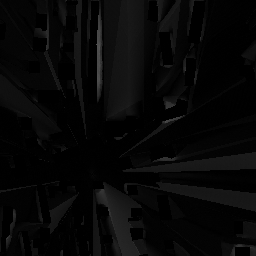

In [30]:

abs_diff = np.abs(g_image_np - s_image_np)
Image.fromarray(np.uint8(abs_diff))

In [31]:
abs_diff

array([[ 6.,  4.,  4., ...,  0.,  0.,  1.],
       [ 5.,  4.,  3., ...,  0.,  0.,  0.],
       [ 9.,  4.,  5., ...,  0.,  1.,  0.],
       ...,
       [ 4.,  3.,  5., ..., 30., 32., 30.],
       [ 2.,  3.,  2., ..., 30., 32., 31.],
       [ 4.,  3.,  1., ..., 29., 29., 28.]], dtype=float32)

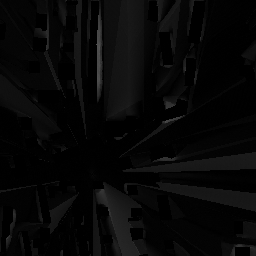

In [32]:

abs_diff = np.abs(g_image_np - s_image_np)
Image.fromarray(np.uint8(abs_diff))